In [299]:
from datetime import datetime
import pandas as pd
import folium
import requests
from google_api import get_lat_lon
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



In [300]:
df = pd.read_csv('cleaned.csv').drop(['Unnamed: 0'],axis=1)
df=df.dropna()


In [301]:
df

,price,Address,bedroom,bathroom,size_sqf,types,city,province,Latitude,Longitude
0,1425,Poplar,1,1,533,Apt/Condo,Abbotsford,BC,49.075942,-122.247779
1,2245,Poplar,2,2,910,Apt/Condo,Abbotsford,BC,49.075942,-122.247779
2,1350,Abbotsford West,1,1,538,Apt/Condo,Abbotsford,BC,49.039034,-122.430243
3,1725,Poplar,1,1,689,Apt/Condo,Abbotsford,BC,49.075942,-122.247779
4,1625,Central Abbotsford,2,1,846,Apt/Condo,Abbotsford,BC,49.050438,-122.304470
...,...,...,...,...,...,...,...,...,...,...
3363,1535,Av. Lennox,1,1,700,House,Montreal,Quebec,45.512978,-73.624023
3364,6999,Rue Sherbrooke O.,2,2,1175,House,Montreal,Quebec,45.481598,-73.600424
3365,1437,Av. Somerled,2,1,770,House,Montreal,Quebec,45.467881,-73.638234
3366,3500,Tsse St-Denis,3,2,1800,House,Montreal,Quebec,45.516377,-73.566669


In [302]:
bedrooms = df['bedroom'].value_counts()
bathrooms=df['bathroom'].value_counts()


# Numebr of homes for rent by number of bedrooms 

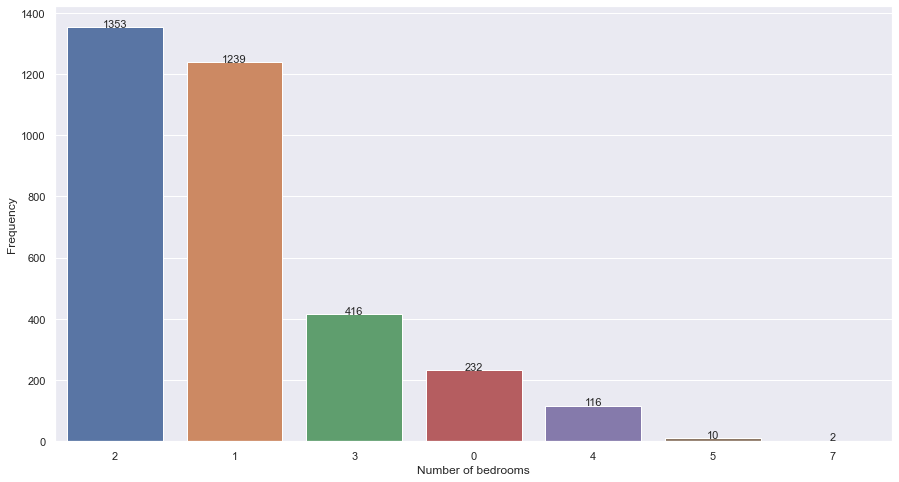

In [303]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.countplot(x=df['bedroom'],
                   order=df['bedroom'].value_counts(ascending=False).index);
ax.set_xlabel("Number of bedrooms")
ax.set_ylabel("Frequency")

abs_values = df['bedroom'].value_counts(ascending=False).values

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)



Two bedrooms are the most common one and then one bedroom places.

# Distribution of rental houses by number of bathrooms

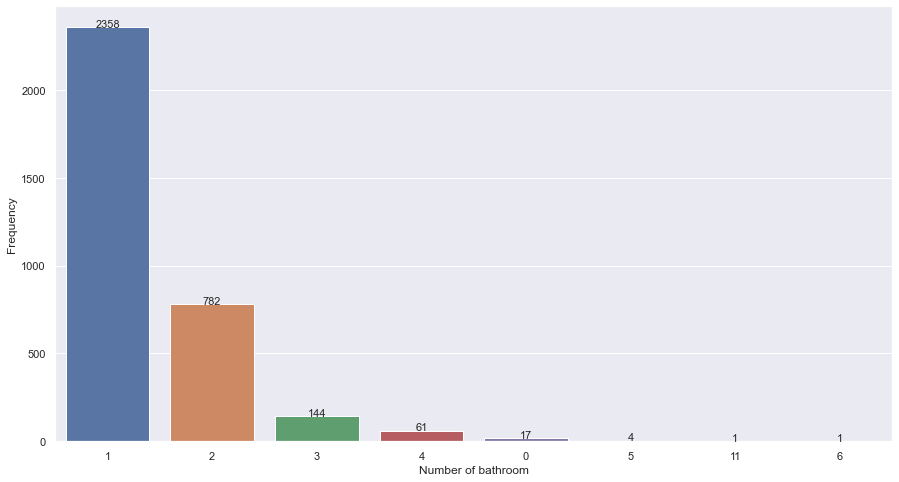

In [304]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.countplot(x=df['bathroom'],
                   order=df['bathroom'].value_counts(ascending=False).index);
ax.set_xlabel("Number of bathroom")
ax.set_ylabel("Frequency")

abs_values = df['bathroom'].value_counts(ascending=False).values

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)



The most of the house in the sample has one bedroom. After that, two bedroom  houses are common

# Distribution of rentals by types

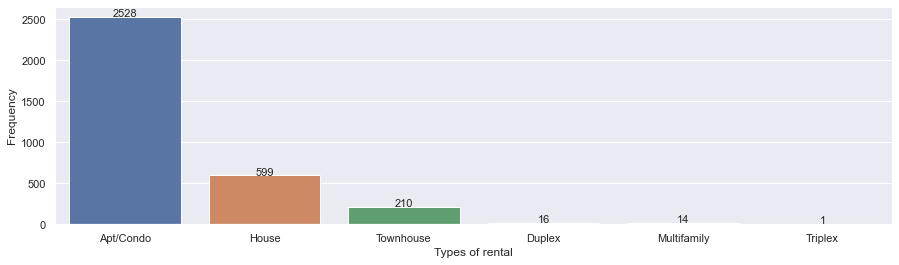

In [305]:
sns.set(rc = {'figure.figsize':(15,4)})
ax = sns.countplot(x=df['types'],
                   order=df['types'].value_counts(ascending=False).index);
ax.set_xlabel("Types of rental")
ax.set_ylabel("Frequency")

abs_values = df['types'].value_counts(ascending=False).values

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)



Apartments/condos are the most common places listed to rent. The second place is for houses.

# Distribution of rentals by province

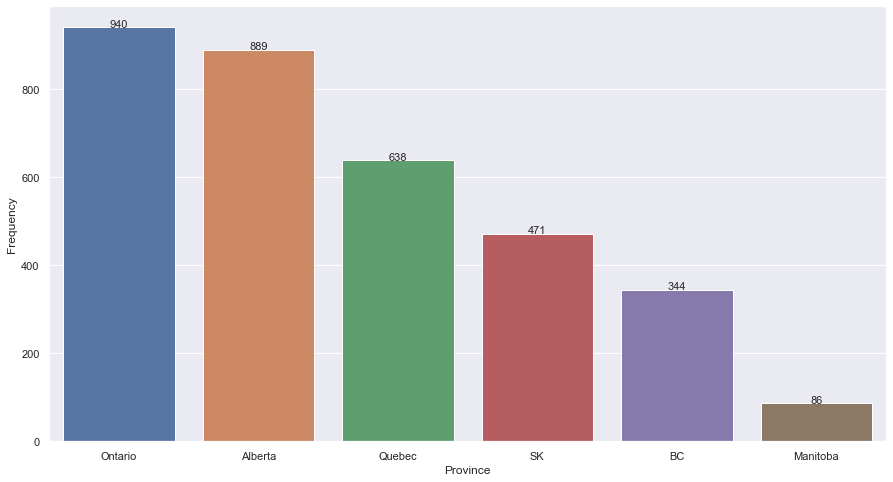

In [306]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.countplot(x=df['province'],
                   order=df['province'].value_counts(ascending=False).index);
ax.set_xlabel("Province")
ax.set_ylabel("Frequency")

abs_values = df['province'].value_counts(ascending=False).values

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)



Ontario and Alberta are oversampled in our data. This is possibly because the website that data was gathered from is more active in those provinces.

# I will find which combination of bedrooms and bathrooms are the most popular in the housing rental market

In [307]:
df1=df[['bedroom','bathroom']]
df1 = df1.groupby(['bedroom','bathroom']).size()
df1 = pd.DataFrame({'Counts':df1})
df1 = df1.reset_index()


Text(0, 0.5, 'Number of bathrooms')

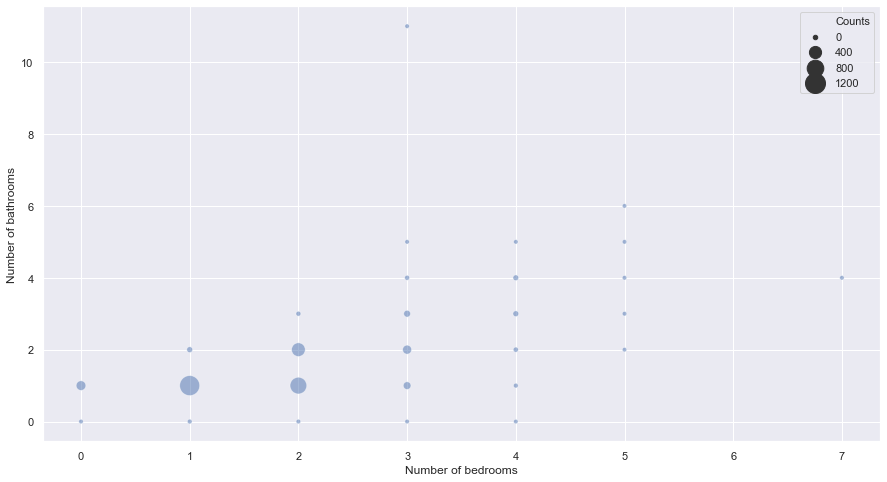

In [308]:
ax=sns.scatterplot(data=df1, x="bedroom", y="bathroom", size="Counts", alpha=0.5, sizes=(20, 400))
ax.set_xlabel("Number of bedrooms")
ax.set_ylabel("Number of bathrooms")


As we can see in the above graph, the most common rental is one bedroom, one bathroom place. The second common is two bedrooms and one bathroom place. The third common is two bedroom two bathroom place. 

Text(0, 0.5, 'Number of types')

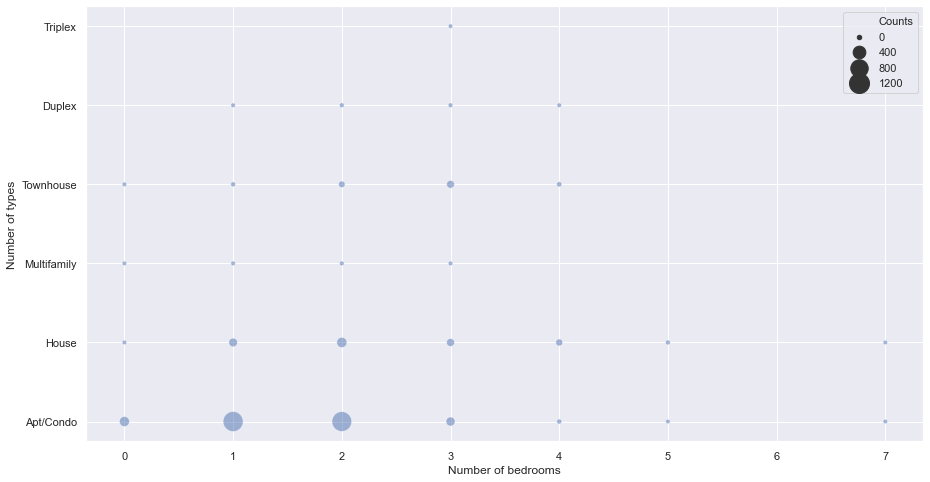

In [309]:
df1=df[['bedroom','types']]
df1 = df1.groupby(['bedroom','types']).size()
df1 = pd.DataFrame({'Counts':df1})
df1 = df1.reset_index()
ax=sns.scatterplot(data=df1, x="bedroom", y="types", size="Counts", alpha=0.5, sizes=(20, 400))
ax.set_xlabel("Number of bedrooms")
ax.set_ylabel("Number of types")


We can also see in the above graph that most of the apartments listed in the market have 1 or two bedrooms. For the houses, however, they are distributed more evenly between 1,2,3 ,4 bedrooms

Text(0, 0.5, 'Size(square feet)')

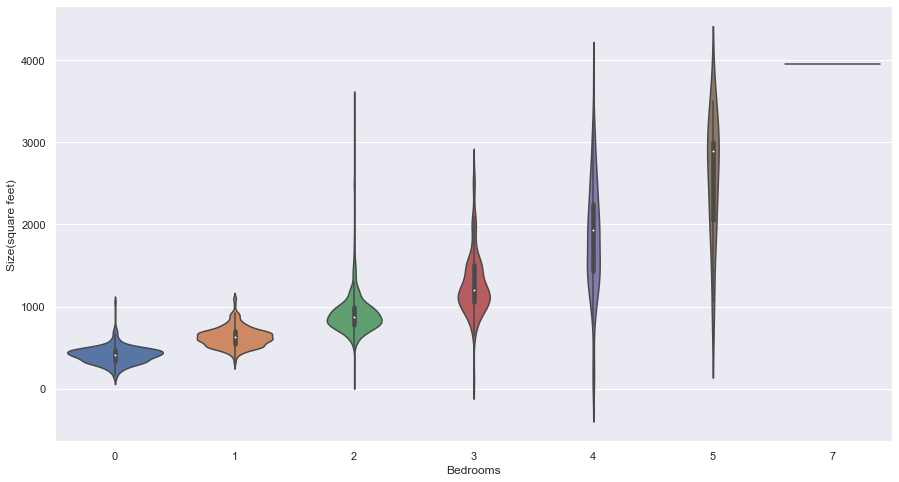

In [310]:
ax=sns.violinplot(x='bedroom',y='size_sqf',data=df)
ax.set_xlabel("Bedrooms")
ax.set_ylabel("Size(square feet)")

the above graph shows the relationship between the number of bedrooms and rental size. As it shows, as the number of bedrooms increases the median size also increases. Furthermore, it is clear that zero and one-bedroom places are more around their median size. This means that their size are more similar to each other. As the number of bedrooms increases, the size variant also increases

# Price's relationship with other variables

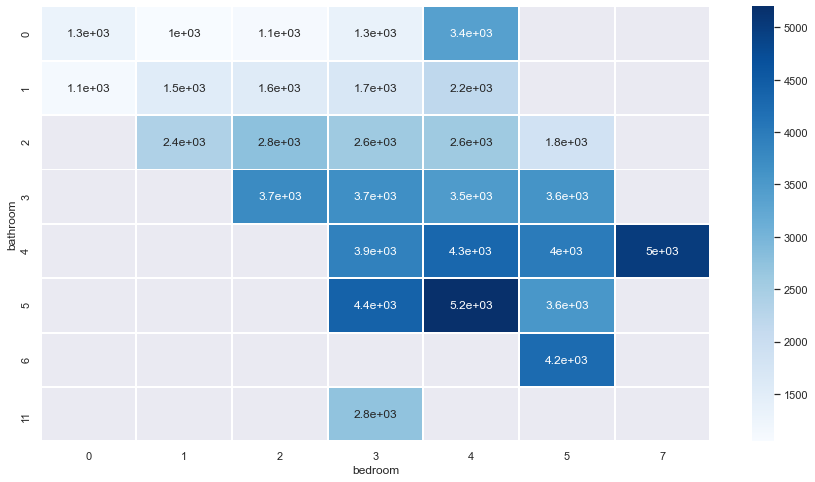

In [311]:
df1 = df.pivot_table(index='bathroom', columns='bedroom', values='price')
sns.heatmap(df1, cmap='Blues', linecolor='white',annot=True,linewidth=1)

The above graph suggests 7 bedrooms, 7 bathrooms houses are the most expensive in Canada (on average)

Text(0, 0.5, 'Rent per month')

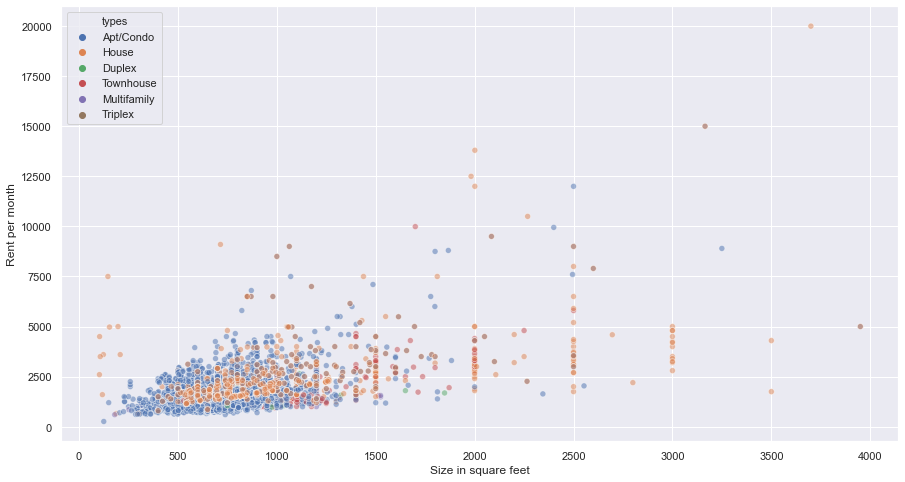

In [312]:
ax=sns.scatterplot(data=df, x="size_sqf", y="price",hue='types' ,alpha=0.5, sizes=(20, 400))
ax.set_xlabel("Size in square feet")
ax.set_ylabel("Rent per month")


From the above graph, it is clear that as size increases the price also increases. Importantly, different colors show the size and price of different types of rentals. It is clear that the yellow dots indicating houses are more and red dots indicating townhouses are more likely to be bigger than apt/condos (the blue dots)

Text(0, 0.5, 'Longitude')

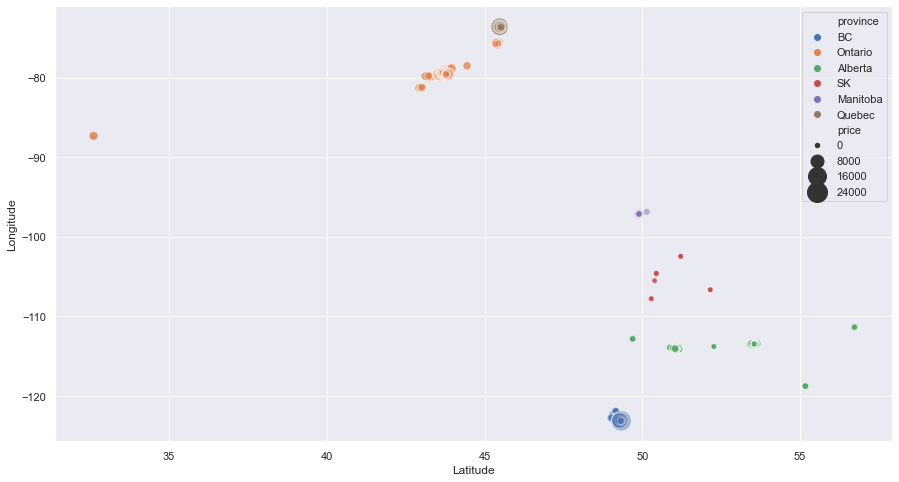

In [313]:
ax=sns.scatterplot(data=df, x="Latitude", y="Longitude",hue='province',size="price" ,alpha=0.5, sizes=(20, 400))
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")


From the above graph it is also clear that the expensive houses are located mostly in BC.

Text(17.200000000000003, 0.5, 'Rent per month')

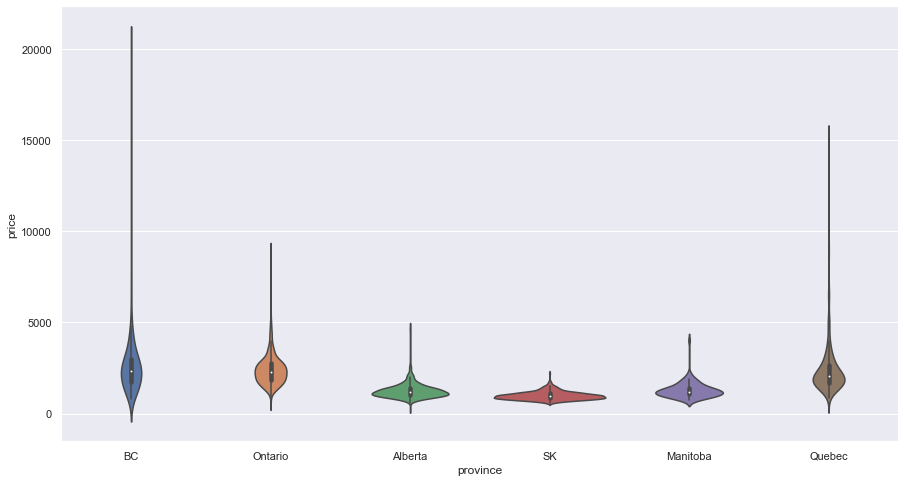

In [317]:
sx=sns.violinplot(x='province',y='price',data=df)
ax.set_xlabel("Province")
ax.set_ylabel("Rent per month")


The above graph suggests that in Canada the median rental prices in BC and Ontario are similar to each other. The cheapest median price is also for Saskatchewan. Interestingly, the graph also suggests that in Saskatchewan, prices are more similar to the median. After Saskatchewan, the rental prices in Manitoba and Alberta are more similar to the median. However, the BC suggests that the prices in this province are more variants than any other provinces 

Text(17.200000000000003, 0.5, 'Rent per month')

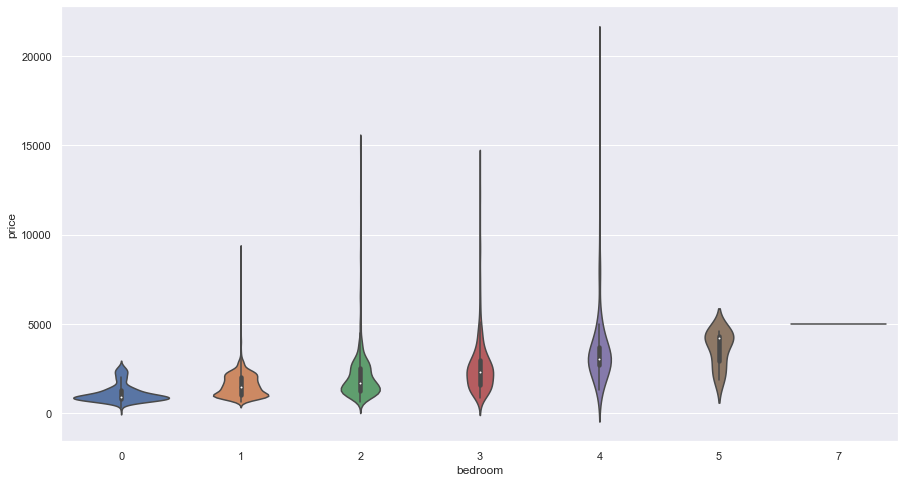

In [318]:
sx=sns.violinplot(x='bedroom',y='price',data=df)
ax.set_xlabel("Bedrooms")
ax.set_ylabel("Rent per month")

The above graph shows the relationship between the number of bedrooms and price. It is not surprising that as the number of bedrooms increases the price also increases (the white dot at the middle of each violin shows median ). It is interesting, however, that as the number of bedrooms increases the shape of distribution becomes skinnier. This means that in 0 and one-bedroom apartments prices are more concentrated around the median. 
 It is clear that 0 bedroom apartments (studios) a

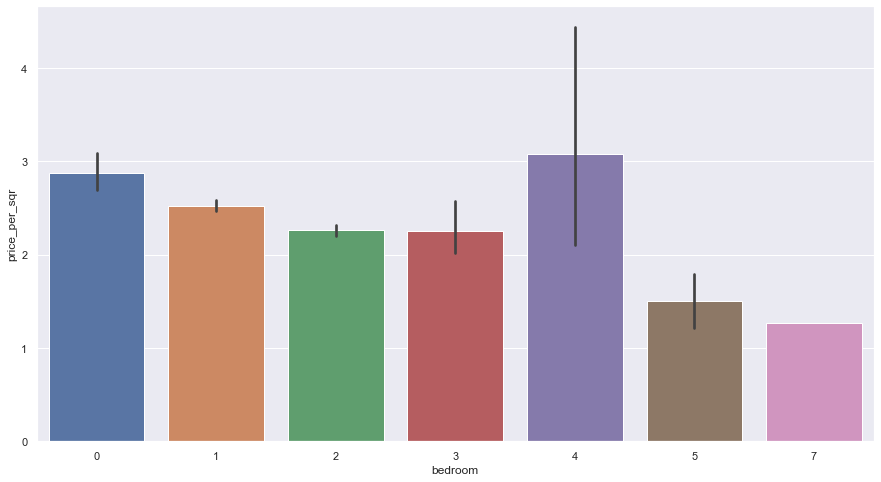

In [319]:
from numpy import mean
ax = sns.barplot(x="bedroom", y="price_per_sqr", data=df1,estimator=mean)


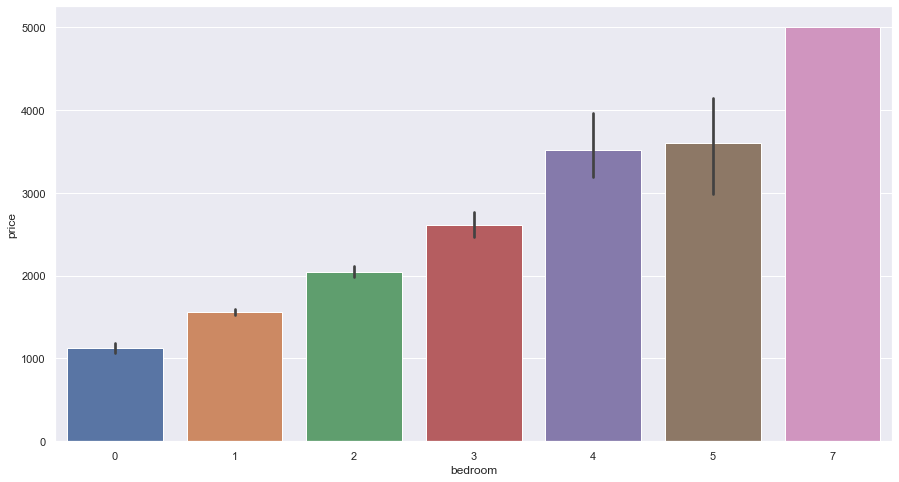

In [321]:
from numpy import mean
ax = sns.barplot(x="bedroom", y="price", data=df,estimator=mean)


Text(0, 0.5, 'Rent (montly) per square')

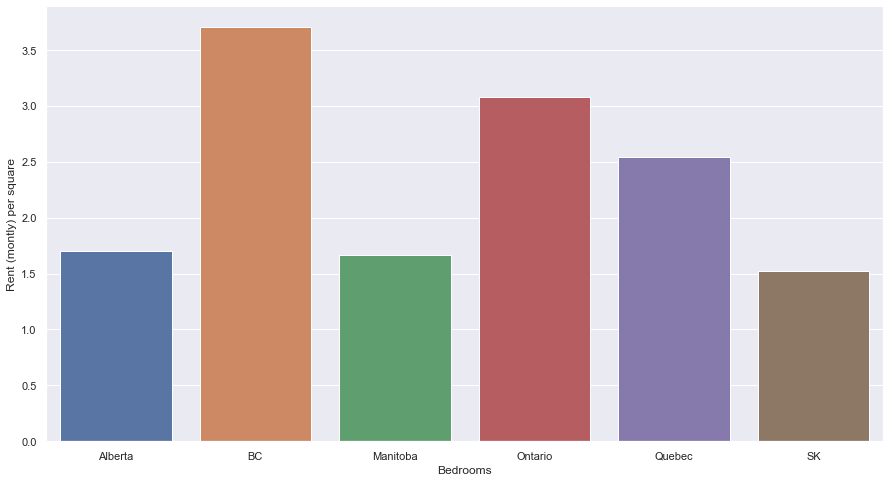

In [324]:
df1=df
df1['price_per_sqr']=df1['price']/df1['size_sqf']

df2=df1[['province','price_per_sqr']]
df2 = df2.groupby('province')['price_per_sqr'].mean()
df2 = pd.DataFrame({'Mean_price_per_sqr':df2})
df2 = df2.reset_index()
ax = sns.barplot(x="province", y="Mean_price_per_sqr", data=df2,estimator=mean)
ax.set_xlabel("Bedrooms")
ax.set_ylabel("Rent (montly) per square")

The graph shows price per square in 7 provinces of Canada. As the graph suggests rental price per square is the highest in BC and then In ontario. The rental price per square is similar in Saskatchewan and Alberta. 
